# 로지스틱 회귀분석(Logistic Regression) - 분류

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. Sigmoid Activation

> ## 1) sigmoid( ) 정의

In [3]:
import numpy as np

def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

> ## 2) sigmoid( ) 실행

In [4]:
sigmoid(0)

0.5

In [5]:
sigmoid(100000000)

1.0

In [6]:
sigmoid(-100000000)

0.0

> ## 3) sigmoid( ) 시각화

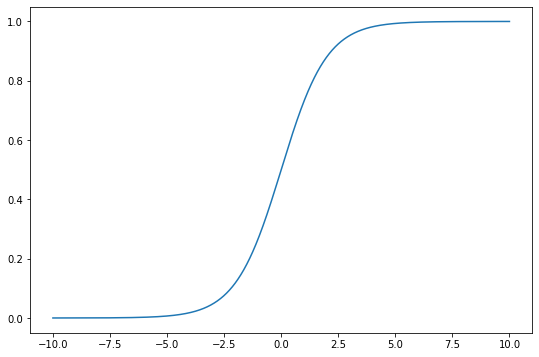

In [7]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()

# II. Cross Entropy Error

> ## 1) Information Theory

* Information Gain(정보 이득량)
 * 자주 발생하지 않는 사건은 자주 발생하는 사건보다 정보량이 많음
 * Information Gain(정보 이득량)은 정보의 희귀성에 비례
 * I(x) = –log(P(x))
* Degree of Surprise
 * 예상하기 어려운 정보에 더 높은 가치를 매기는 것

> (1) 발생 확률이 서로 다른 사건 A, B, C - Information Gain

In [8]:
import math

A = 0.6
B = 0.3
C = 0.1

print( '%.3f' % -math.log(A), '%.3f' % -math.log(B), '%.3f' % -math.log(C))

0.511 1.204 2.303


> (2) AlphaGo와 Apes의 바둑대결 승리 확률 - Degree of Surprise

In [9]:
Alphago = 0.99
Apes = 0.01

print('%.3f' % -math.log(Alphago), '%.3f' % -math.log(Apes))

0.010 4.605


> ## 2) Entropy

* 불확실성의 정도
 * Entropy = E(–log(P(x)))
* 확률변수의 평균 정보량(기댓값)
 * –sum(p(x) * log(p(x)))
* 불확실성(Entropy)이 낮으면 분류정확도가 높아짐

> (1) 승률이 비슷한 두팀의 Entropy

In [10]:
P1 = 0.5
P2 = 0.5

-P1 * math.log(P1) - P2 * math.log(P2)

0.6931471805599453

> (2) 승률 차이가 큰 두팀의 Entropy

In [11]:
P1 = 0.99
P2 = 0.01

-P1 * math.log(P1) - P2 * math.log(P2)

0.056001534354847345

> ## 3) Cross Entropy

* 서로 다른 사건의 확률을 곱하여 Entropy를 계산
 * y : 실제값, y_hat : 예측값(can be incorrect)
* y를 Cross-Entropy의 가중치로 적용
 * Binomial Classification Loss = –y * log(y_hat) – (1 - y) * log(1 - y_hat)
 * Multinomial Classification Loss = –sum(y * log(y_hat))

# III. One Hot Encoding

> ## 1) Import Packages

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

> ## 2) 문자형 데이터

In [13]:
LB = ['cat', 'dog', 'bird', 'dog', 'bird', 'cat']
LB

['cat', 'dog', 'bird', 'dog', 'bird', 'cat']

> ## 3) 숫자형 데이터로 변환

In [14]:
encoder = LabelEncoder()
encoder.fit(LB)
VT = encoder.transform(LB)

VT = VT.reshape(-1, 1)
VT

array([[1],
       [2],
       [0],
       [2],
       [0],
       [1]])

> ## 4) One Hot Encoding

In [15]:
OHE = OneHotEncoder(categories = 'auto')
OHE.fit(VT)
y_OHE = OHE.transform(VT)

y_OHE.toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

# IV. Scaling

* 실습 데이터 생성

In [16]:
import numpy as np

V1 = np.array((0, 1, 2, 3, 4, 5))
V1

array([0, 1, 2, 3, 4, 5])

> ## 1) Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(V1.reshape(-1, 1))
V1_SN = scaler.transform(V1.reshape(-1, 1))

V1_SN

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

> ## 2) Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(V1.reshape(-1, 1))
V1_SS = scaler.transform(V1.reshape(-1, 1))

V1_SS

array([[-1.46385011],
       [-0.87831007],
       [-0.29277002],
       [ 0.29277002],
       [ 0.87831007],
       [ 1.46385011]])

> ## 3) Distribution Visualization

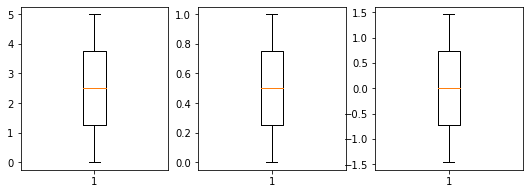

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (9, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.boxplot(V1)
ax2.boxplot(V1_SN)
ax3.boxplot(V1_SS)
plt.show()

# 
# 
# 
# The End
# 
# 
# 